In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import array_to_img

rootPath = './dataset/fruit'

imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
    validation_split=.1
)

trainGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'train'),
    target_size=(112, 112),
    subset='training'
)

validationGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'test'),
    target_size=(112, 112),
    subset='validation'
)

Found 4500 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [29]:
model = Sequential()

model.add(layers.InputLayer(input_shape=(112, 112, 3)))
model.add(layers.Conv2D(16, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.2))

model.add(layers.Conv2D(32, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.2))

model.add(layers.Conv2D(64, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [30]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['acc'],
)

In [31]:
epochs = 32
history = model.fit(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=trainGen.samples / epochs, 
    validation_data=validationGen,
    validation_steps=trainGen.samples / epochs,
)

Epoch 1/32
140/140 [==============================] - 15s 100ms/step - loss: 2.2094 - acc: 0.1384 - val_loss: 2.0037 - val_acc: 0.1800
Epoch 2/32
140/140 [==============================] - 13s 95ms/step - loss: 1.9750 - acc: 0.2267 2s - 
Epoch 3/32
140/140 [==============================] - 13s 95ms/step - loss: 1.7978 - acc: 0.3027
Epoch 4/32
140/140 [==============================] - 13s 95ms/step - loss: 1.7375 - acc: 0.3202 2s - loss: 1.7332 - acc: - ETA: 2s - loss: 1.7332 - ac - ETA: 1s - loss: 1.7331
Epoch 5/32
140/140 [==============================] - 13s 95ms/step - loss: 1.7077 - acc: 0.3311
Epoch 6/32
140/140 [==============================] - 13s 96ms/step - loss: 1.6769 - acc: 0.3531
Epoch 7/32
140/140 [==============================] - 13s 95ms/step - loss: 1.6026 - acc: 0.3969
Epoch 8/32
140/140 [==============================] - 13s 95ms/step - loss: 1.5783 - acc: 0.3924 4s - loss: 1.5760 - acc: - ETA: 4s - loss: 1.5882 - acc - ETA: 3s - loss: 1.5838 - acc:  - ETA: 2s -

In [32]:
testGenerator = ImageDataGenerator(
    rescale=1./255
)
testGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'test'),
    target_size=(112, 112),
)

Found 1000 images belonging to 10 classes.


In [34]:
print("-- Evaluate --")
scores = model.evaluate_generator(testGen, steps=1000)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 71.00%


예측: apple
정답: grapes


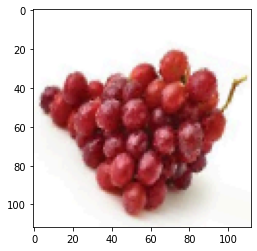

In [39]:
cls_index = ['apple', 'avocado', 'banana', 'grapes', 'kiwi', 'orange', 'papaya', 'pineapple', 'strawberry', 'watermelon']

imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((112, 112))
result = model.predict_classes(arr.reshape(1, 112, 112, 3))
plt.imshow(img)
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])]))

# save

In [40]:
from tensorflow.python.keras.models import load_model
model.save('model/fruit_classification_CNN.h5')

#  load

In [64]:
from tensorflow.python.keras.models import load_model
model = load_model('model/fruit_classification_CNN.h5')